# Project Title: Breast Cancer Diagnosis Classifier

## Name: Ajay Adhithiya Ohm Nathan

### Email Address: aao59@pitt.edu

##### The research question I have chosen is: Can a machine learning model accurately classify breast tumors as malignant or benign based on tumor features? This question is interesting to me because early and accurate diagnosis can save lives, and machine learning can assist in this process. My project is useful in aiding medical professionals to make informed decisions. Doctors, researchers, and healthcare institutions would benefit from this model. My overall plan involves data preprocessing, feature selection, model training, and evaluation. The key is to find a database that has hundreds of patients info on the different features of the tumor, and its classification as Benign or Malignant.

In [12]:
import pandas as pd

df = pd.read_csv('wdbc.csv')

# We check for missing values in each column
missing_values = df.isnull().sum()

# We then print the number of missing values in each column
print(missing_values)


ID                     0
diagnosis              0
radius                 0
texture                0
perimeter              0
area                   0
smoothness             0
compactness            0
concavity              0
concave_points         0
symmetry               0
fractal_dimension      0
radiusSE               0
textureSE              0
perimeterSE            0
areaSE                 0
smoothnessSE           0
compactnessSE          0
concavitySE            0
concave_pointsSE       0
symmetrySE             0
fractal_dimensionSE    0
radiusW                0
textureW               0
perimeterW             0
areaW                  0
smoothnessW            0
compactnessW           0
concavityW             0
concave_pointsW        0
symmetryW              0
fractal_dimensionW     0
dtype: int64


### None of these columns have any missing values.

In [13]:
# We keep the original 10 feature columns and the 'diagnosis' column
# We then filter out columns that end with 'W' or 'SE'
columns_to_keep = [col for col in df.columns if not (col.endswith('W') or col.endswith('SE'))]

# We then ensure 'diagnosis' is in the list, but only once
if 'diagnosis' not in columns_to_keep:
    columns_to_keep.append('diagnosis')

# We then keep only the desired columns
df = df[columns_to_keep]

# We then display the updated DataFrame
print(df.head)


<bound method NDFrame.head of            ID diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302         M   17.99    10.38     122.80  1001.0     0.11840   
1      842517         M   20.57    17.77     132.90  1326.0     0.08474   
2    84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3    84348301         M   11.42    20.38      77.58   386.1     0.14250   
4    84358402         M   20.29    14.34     135.10  1297.0     0.10030   
..        ...       ...     ...      ...        ...     ...         ...   
564    926424         M   21.56    22.39     142.00  1479.0     0.11100   
565    926682         M   20.13    28.25     131.20  1261.0     0.09780   
566    926954         M   16.60    28.08     108.30   858.1     0.08455   
567    927241         M   20.60    29.33     140.10  1265.0     0.11780   
568     92751         B    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave_points  symmetry  fractal_dimens

##### I dropped the last 20 columns of this data set:

I dropped the last 20 columns because it is just a repeat of the 10 features, except it ended with W and SE. Ending with W stands for the worst. It just mean of the largest 3 numbers of that column. And the SE column is just the standard error of each column. I decided to drop these, because for the machine learning model to work properly, we do not want extra numbers regarding the standard error. Also, we do not need the "W" column because that represents the worst cases, which will skew the data greatly. Therfore, we only want to work with raw data with the 10 original features to diagnose breast cancer.

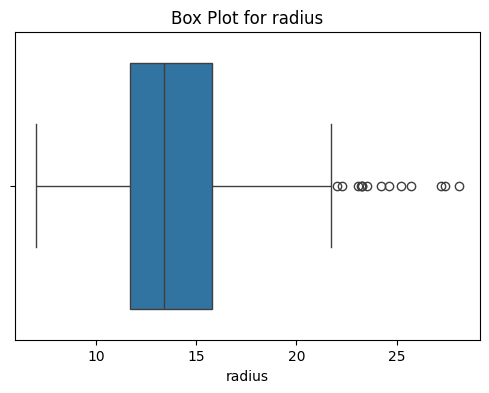

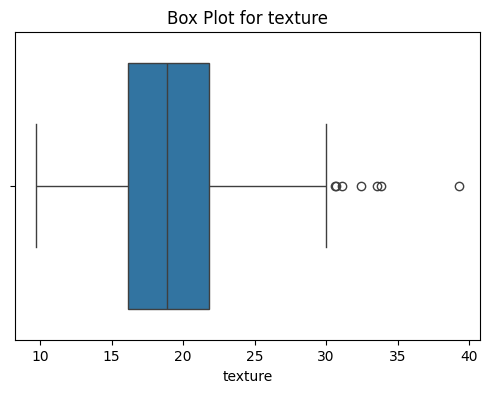

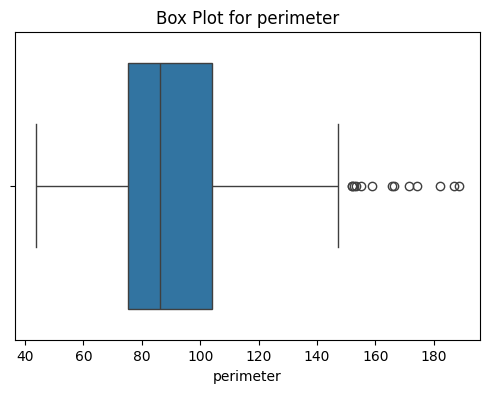

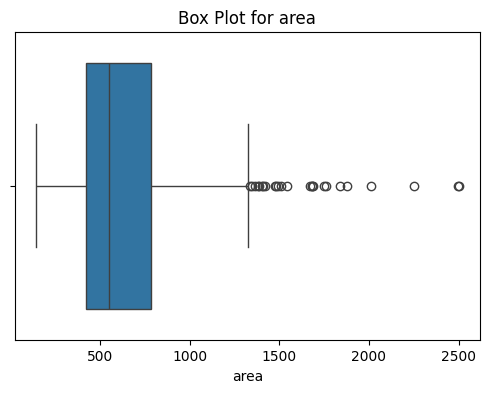

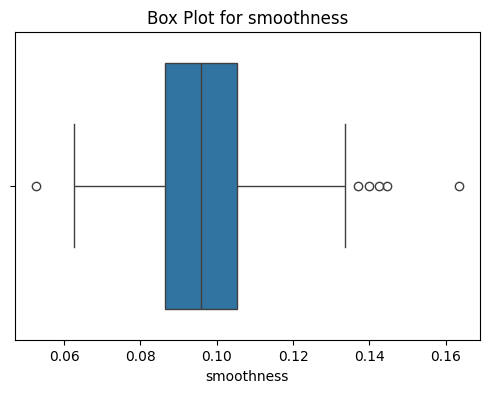

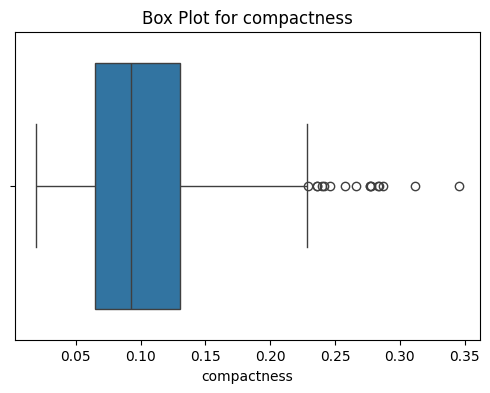

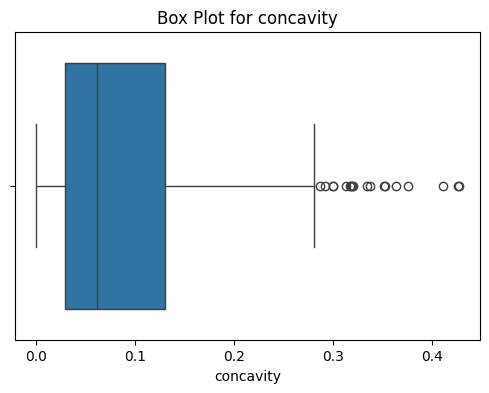

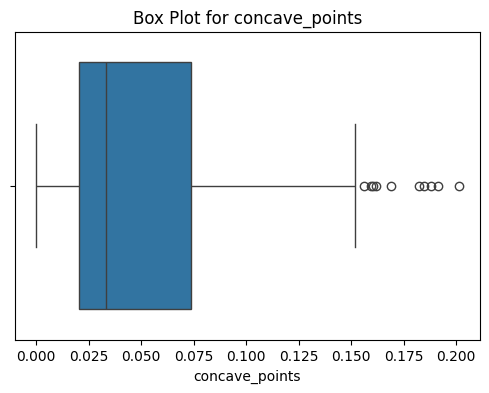

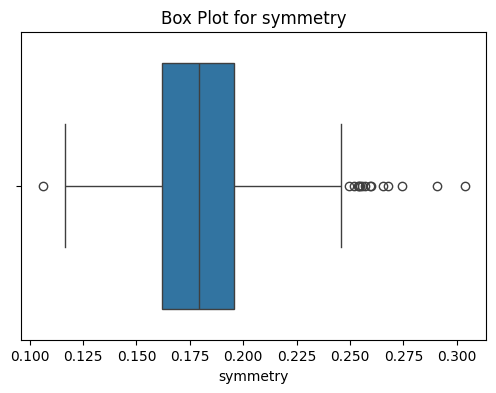

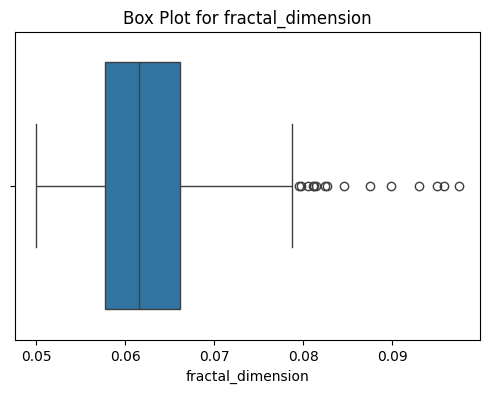

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# WE first list of the 10 features to generate box plots for
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
            'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

# Then we loop through each feature and create a box plot
for feature in features:
    plt.figure(figsize=(6, 4))  # Set the figure size for each plot
    sns.boxplot(x=df[feature])  # Create a box plot for the current feature
    plt.title(f'Box Plot for {feature}')  # Set the title of the plot
    plt.xlabel(feature)  # Label for the x-axis
    plt.show()  # Display the plot


### Justification for Keeping Outliers in the Dataset

In the context of building a machine learning model to predict whether someone has cancer, it is important to carefully consider the treatment of outliers. While outliers are often removed in some machine learning workflows, there are several compelling reasons why **we should keep the outliers** in this dataset:

1. **Real-World Relevance**:
   Outliers in medical datasets often represent rare but real cases that are highly relevant for prediction. For example, a patient with unusual but possible measurements (e.g., very high tumor area or compactness) could represent a rare form of cancer or an advanced stage of the disease. Removing these outliers could result in the model being less sensitive to these rare, but critical, cases.

2. **Cancer Characteristics**:
   In cancer detection, there is significant variability in the size, shape, and texture of tumors across individuals. Tumors can be atypical or aggressive, which might result in extreme measurements. Removing these data points could distort the model's ability to correctly classify all types of cancer, particularly those with more unusual characteristics.

3. **Impact on Model Performance**:
   Outliers can sometimes help the model learn better decision boundaries by representing extreme values that the model should recognize and differentiate from other data points. Removing them could limit the model’s ability to generalize across the entire range of tumor characteristics, which is crucial for real-world applications where outliers may be encountered frequently.

4. **Outliers as Important Indicators**:
   In predictive modeling, particularly in binary classification tasks like cancer prediction, outliers could serve as important indicators of certain conditions. For example, extreme values of certain features (e.g., perimeter or area) could be associated with specific types of cancer. Removing outliers may remove critical information that helps the model distinguish between healthy and cancerous samples.

5. **Alternative Techniques for Handling Outliers**:
   Rather than removing outliers, there are other ways to handle them, such as:
   - **Transformation**: Applying logarithmic or other transformations can reduce the impact of extreme values without losing information.
   - **Robust Models**: Some machine learning algorithms (e.g., Random Forests, XGBoost) are more robust to outliers, meaning they can handle extreme values better without the need to remove them.
   - **Imputation**: If outliers are deemed to be errors or inaccuracies, they can be imputed or capped, rather than removed, which preserves the dataset's integrity.

6. **Model Robustness**:
   By keeping outliers, the model can be more robust and can perform better in real-world scenarios where the data distribution is unknown or varies. In medical diagnostics, it is important for the model to not only be able to predict common cases but also handle rare and extreme cases without failing.

### Conclusion:
Given the importance of identifying both common and rare cases in cancer prediction, removing outliers from the dataset could lead to loss of valuable information that is necessary for the model to generalize well. Therefore, keeping the outliers can help in building a more accurate, reliable, and robust machine learning model for cancer diagnosis.


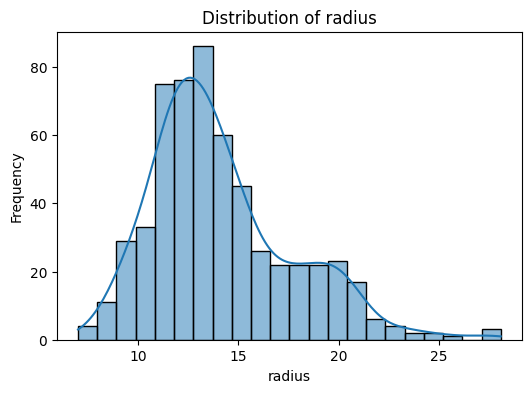

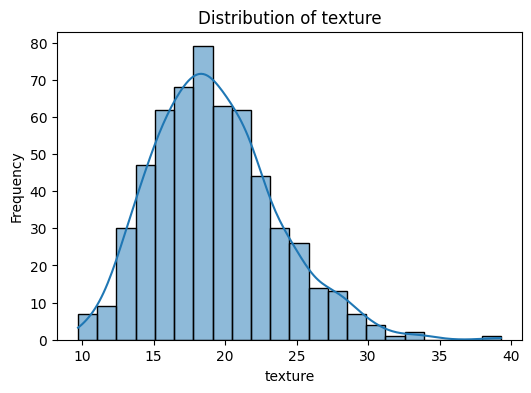

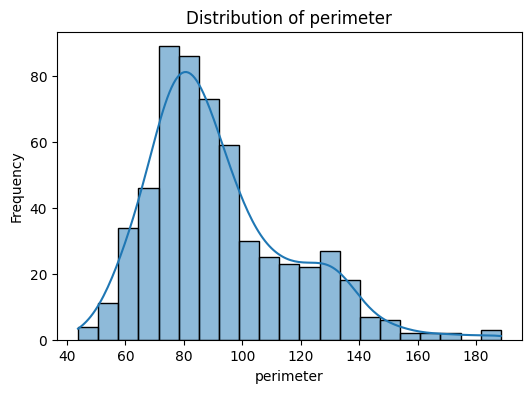

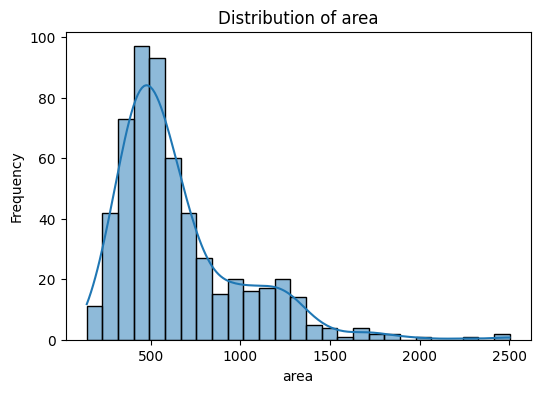

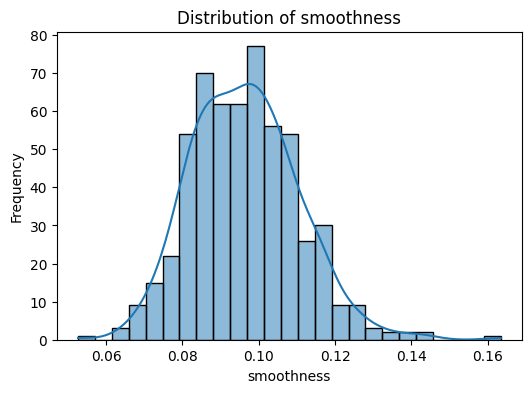

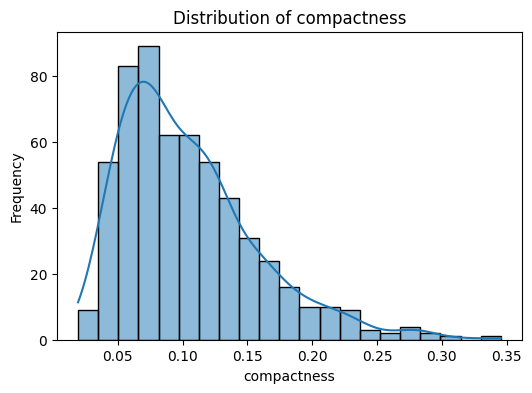

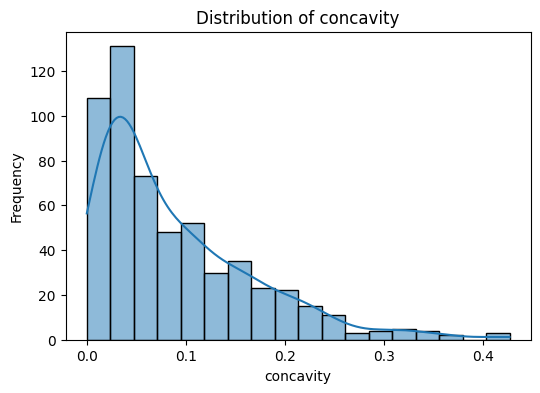

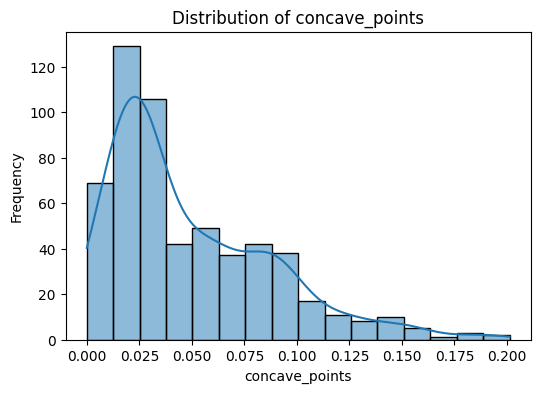

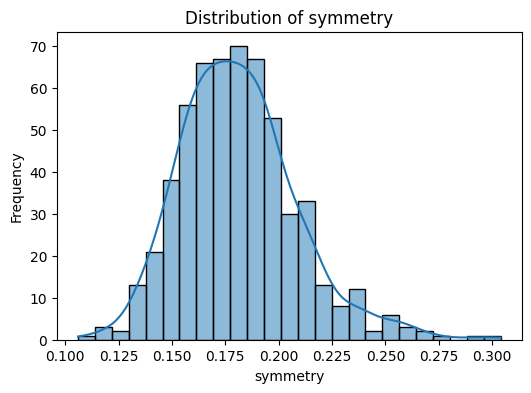

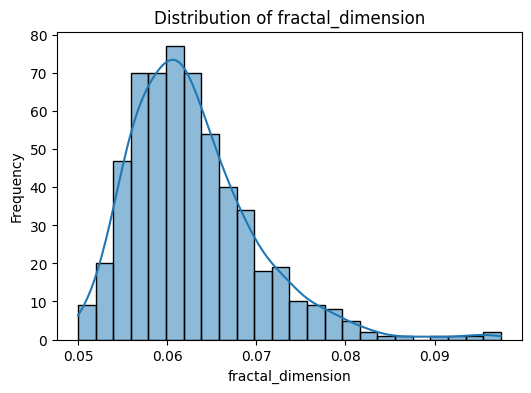

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# We again list of the 10 features to visualize distributions for
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
            'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

# We loop through each feature and create a distribution plot (histogram + KDE)
for feature in features:
    plt.figure(figsize=(6, 4))  # Set the figure size for each plot
    sns.histplot(df[feature], kde=True)  # Create histogram with KDE for the current feature
    plt.title(f'Distribution of {feature}')  # Set the title of the plot
    plt.xlabel(feature)  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.show()  # Display the plot


#### Distribution of the 10 features:

Distribution of radius seems fairly normally distributed.

Distribution of texture seems fairly normally distributed.

Distribution of perimeter seems fairly normally distributed.

Distribution of area is skewed right, so I applied log transformation.

Distribution of smoothness seems fairly normally distributed.

Distribution of compactness seems fairly normally distributed.

Distribution of concavity is skewed right, so I applied log transformation.

Distribution of concave_points is skewed right, so I applied log transformation.

Distribution of symmetry seems fairly normally distributed.

Distribution of fractal_dimension seems fairly normally distributed.


NEGATIVE VALUES
NEGATIVE VALUES


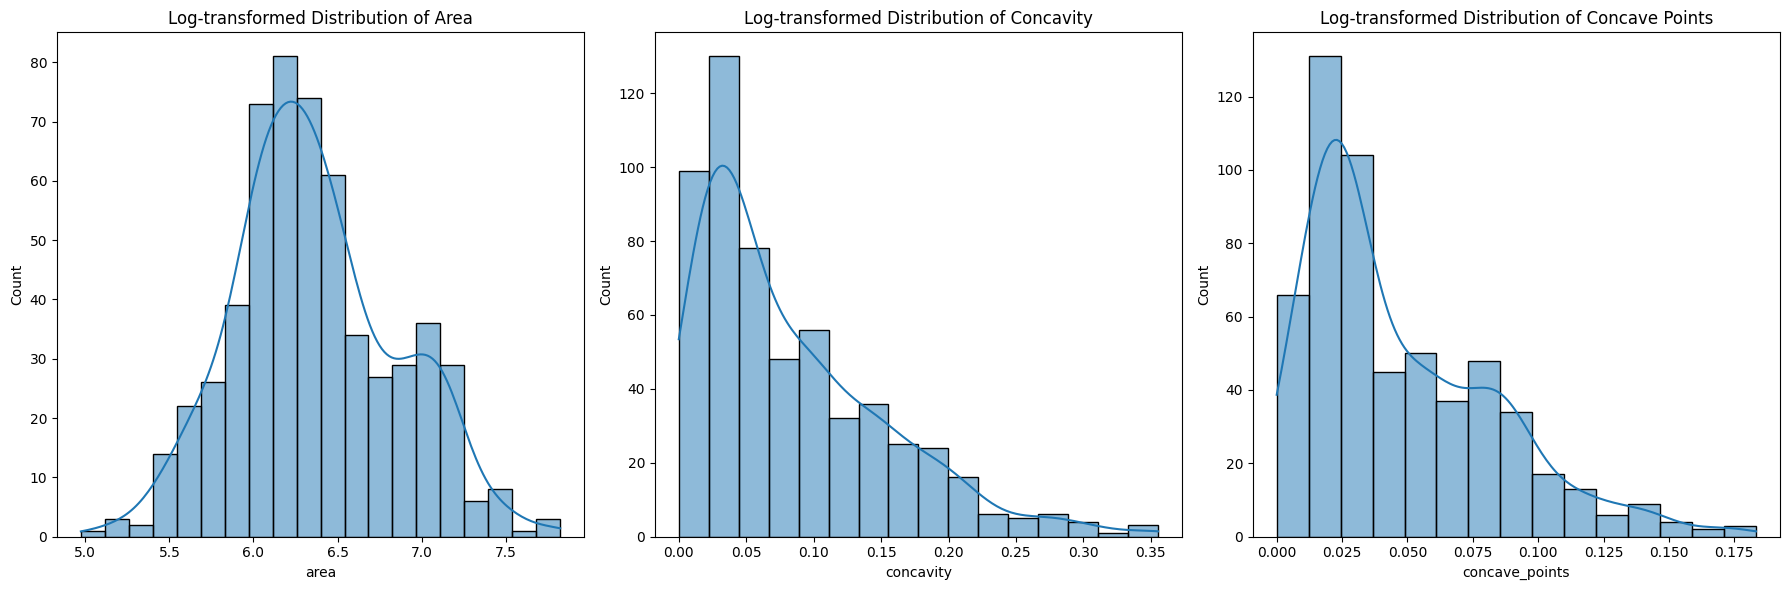

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We first check for zero or negative values in the columns before applying log transformation
if (df['area'] <= 0).any():
    print("NEGATIVE VALUES!")
if (df['concavity'] <= 0).any():
    print("NEGATIVE VALUES")
if (df['concave_points'] <= 0).any():
    print("NEGATIVE VALUES")

# We then apply log transformation (log(x+1)) to 'area', 'concavity', and 'concave_points'
df['area'] = np.log1p(df['area'])
df['concavity'] = np.log1p(df['concavity'])
df['concave_points'] = np.log1p(df['concave_points'])

# Visualize the distributions after the log transformation
plt.figure(figsize=(18, 6))

# Plot the transformed distribution of 'area'
plt.subplot(1, 3, 1)
sns.histplot(df['area'], kde=True)
plt.title('Log-transformed Distribution of Area')

# Plot the transformed distribution of 'concavity'
plt.subplot(1, 3, 2)
sns.histplot(df['concavity'], kde=True)
plt.title('Log-transformed Distribution of Concavity')

# Plot the transformed distribution of 'concave_points'
plt.subplot(1, 3, 3)
sns.histplot(df['concave_points'], kde=True)
plt.title('Log-transformed Distribution of Concave Points')
plt.tight_layout()
plt.show()


#### After applying log transformations, the distribution of these fields look a lot more normally distributed.

### Justification for Not Scaling the Variables

Scaling may not be necessary for this dataset because the variables represent meaningful physical measurements, such as area, perimeter, and radius. These measurements carry intrinsic significance, and their relative magnitudes might provide important information for distinguishing between malignant and benign diagnoses. Altering their scales could risk losing these natural relationships, which might be vital for understanding the underlying patterns in the data.


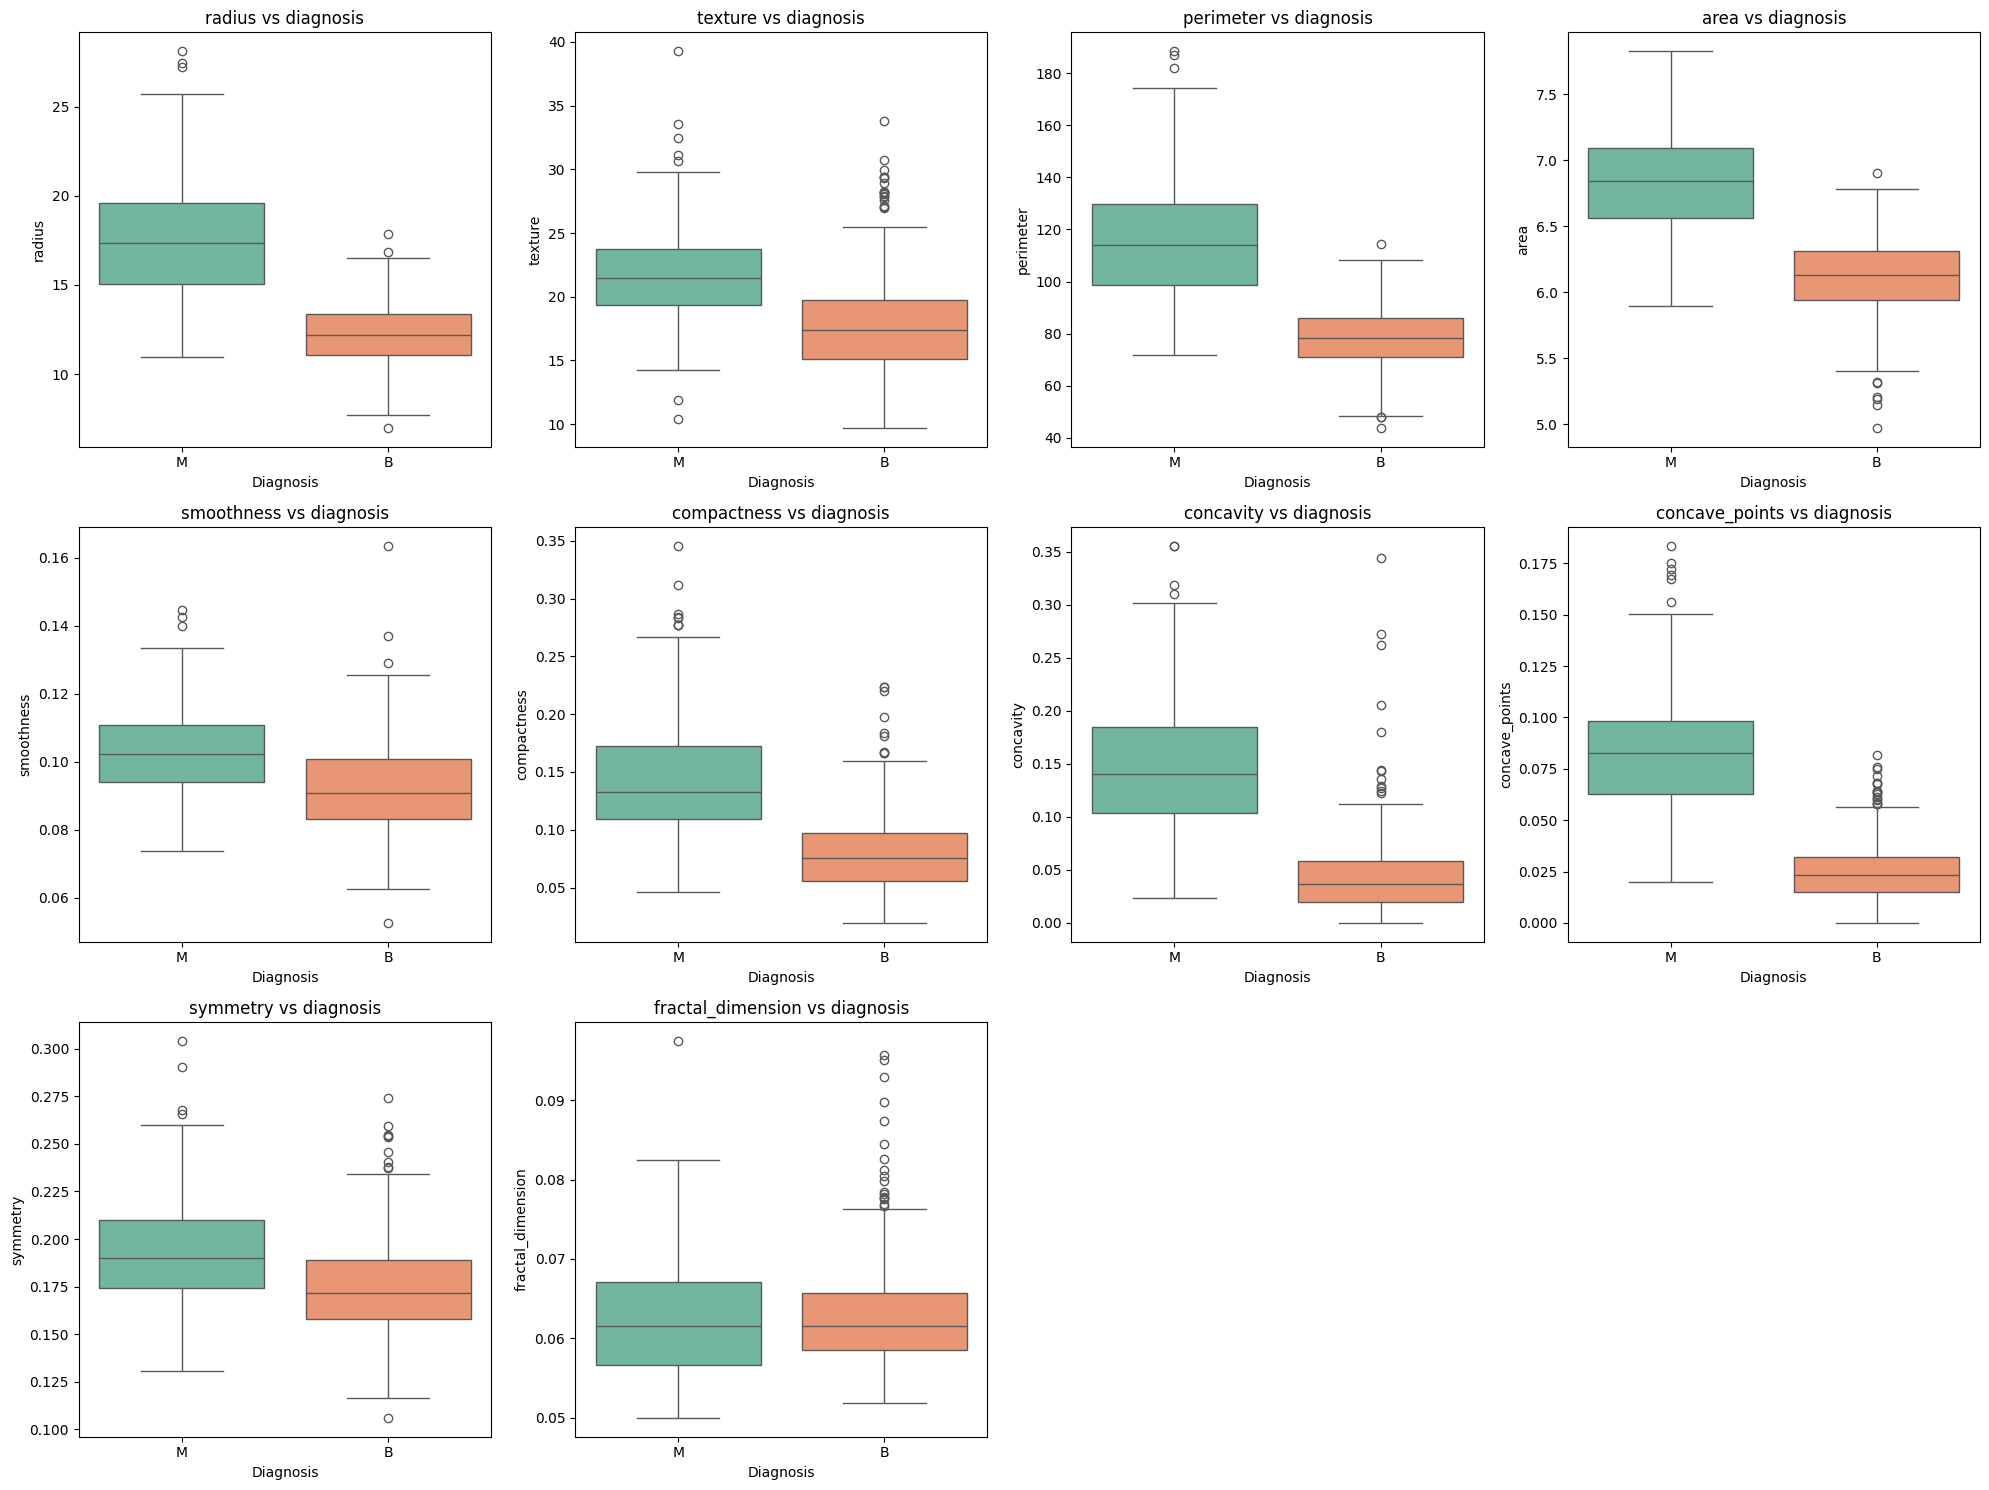

In [17]:
plt.figure(figsize=(20, 15))

# We first try getting the feature columns (last 10 columns) and the target column
features = df.columns[-10:]
target = 'diagnosis'

# Then we create boxplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Create a grid with 3 rows and 4 columns
    sns.boxplot(data=df, x=target, y=feature, hue=target, palette="Set2", dodge=False, legend=False)
    plt.title(f'{feature} vs {target}')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

# We need to avoid overlap
plt.tight_layout()
plt.show()

### Visualization of relationship between each of the 10 features, with the diagnosis

As obvious as it shows, we can clearly see, that when the diagnosis is cancerous (Malignant) the average box plot is considerably higher than when the diagnosis is Benign.

### Feature Selection

i. Features I am planning on using for my analysis: Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave_points, Symmetry, Fractal_dimension

ii. I am using these particular features, because all these features relate to important information about having (or not) breast cancer. Each of these feature plays a very important role in my model to predict if someone will have breast cancer (malignant or benign). I also made sure not to use the last 20 columns of the original data set, because it just includes the worst case, and standard error of each column. Which is irrelevant in this case.

iii. Descriptive statistics for each feature has been shown below

iv. Predictors: Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave_points, Symmetry, Fractal_dimension

Response: Diagnosis

v. Almost all of the variables (columns) had outliers, but I decided to still keep them, and their justification was given up above. Some features were skewed right, so I had to apply log transformation, to make them more normally distributed. The exact features, and how I did it is shown above. None of the columns had any missing values. Descriptions with visualizations on how I dealth with the issues are shown above.

In [18]:
# Getting the feature columns (last 10 columns)
features = df.columns[-10:]

# Displaying descriptive statistics for the features
descriptive_stats = df[features].describe()
print(descriptive_stats)

           radius     texture   perimeter        area  smoothness  \
count  569.000000  569.000000  569.000000  569.000000  569.000000   
mean    14.127292   19.289649   91.969033    6.365109    0.096360   
std      3.524049    4.301036   24.298981    0.482274    0.014064   
min      6.981000    9.710000   43.790000    4.973280    0.052630   
25%     11.700000   16.170000   75.170000    6.043345    0.086370   
50%     13.370000   18.840000   86.240000    6.313729    0.095870   
75%     15.780000   21.800000  104.100000    6.664026    0.105300   
max     28.110000   39.280000  188.500000    7.824846    0.163400   

       compactness   concavity  concave_points    symmetry  fractal_dimension  
count   569.000000  569.000000      569.000000  569.000000         569.000000  
mean      0.104341    0.082552        0.047095    0.181162           0.062798  
std       0.052813    0.070113        0.036268    0.027414           0.007060  
min       0.019380    0.000000        0.000000    0.106000

Accuracy: 0.9474
AUC Score: 0.9918


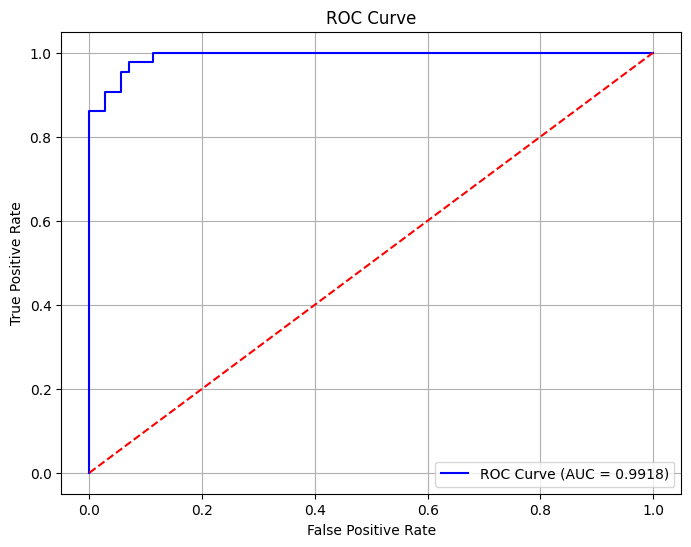

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the data into predictors (X) and response (y)
X = df.iloc[:, 2:]  # Last 10 columns as predictors
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Mapping 'M' to 1 and 'B' to 0

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### Naive Bayes is a simple and computationally efficient machine learning algorithm, making it a suitable choice for tasks like breast cancer diagnosis, especially when starting with a baseline model. Its ability to handle categorical outcomes aligns well with the binary nature of the diagnosis column (malignant or benign), and it provides interpretable outputs in the form of class probabilities, which can help assess prediction certainty. Additionally, Naive Bayes performs well on moderately high-dimensional data and is robust even with relatively small datasets, as long as the data is properly preprocessed.

However, the model has notable limitations in this context. A key weakness is its assumption that features are conditionally independent given the class label, which is rarely true in real-world scenarios like breast cancer diagnosis where features such as radius, perimeter, and area are likely correlated. This independence assumption can result in suboptimal performance. Furthermore, while Gaussian Naive Bayes assumes a Gaussian distribution for continuous features, deviations from this assumption may negatively impact the model’s effectiveness. Naive Bayes also struggles with capturing complex relationships or interactions between features, which might be critical in accurately diagnosing breast cancer. If the dataset has an imbalanced distribution of malignant and benign cases, the model could be biased toward the majority class unless appropriate preprocessing techniques are applied. Lastly, the probabilities predicted by Naive Bayes can be overconfident due to its simplifying assumptions, which might not accurately reflect the true uncertainty in predictions.

Overall, Naive Bayes offers a practical starting point for building a predictive model due to its simplicity and speed. However, given its limitations, it may not be the best choice for capturing the nuanced patterns in the data. Exploring more advanced models, such as Support Vector Machines, Random Forests, or Gradient Boosting, could provide greater accuracy and reliability, especially in datasets with feature dependencies or complex relationships. Nonetheless, Naive Bayes remains a valuable baseline model for comparative analysis.

### The performance metrics from the Naive Bayes model—an accuracy of 94.74% and an AUC score of 0.9918—indicate strong predictive performance in diagnosing breast cancer.

Accuracy measures the proportion of correctly predicted instances (both malignant and benign) out of the total predictions. An accuracy of 94.74% means that the model correctly classified nearly 95% of the cases in the test set. While this is a high value, accuracy alone can be misleading if the dataset is imbalanced, such as having significantly more benign cases than malignant ones.

The AUC score (Area Under the ROC Curve) provides a more robust evaluation of the model’s discriminatory ability. It measures how well the model can distinguish between the two classes (malignant and benign) regardless of the chosen decision threshold. An AUC of 0.9918 is extremely high, suggesting that the model is almost perfect at separating malignant tumors from benign ones. For example, if you randomly select a malignant and a benign case, the model would assign a higher probability of being malignant to the malignant case over 99% of the time.

These metrics suggest that the Naive Bayes model performs exceptionally well on the given data. The high AUC score particularly indicates that the model is reliable for making predictions, even across varying thresholds. However, it is still essential to consider potential biases, such as whether the data distribution is representative of real-world cases, and validate the model on an independent dataset to ensure generalizability.

Accuracy: 0.9211
AUC Score: 0.9831


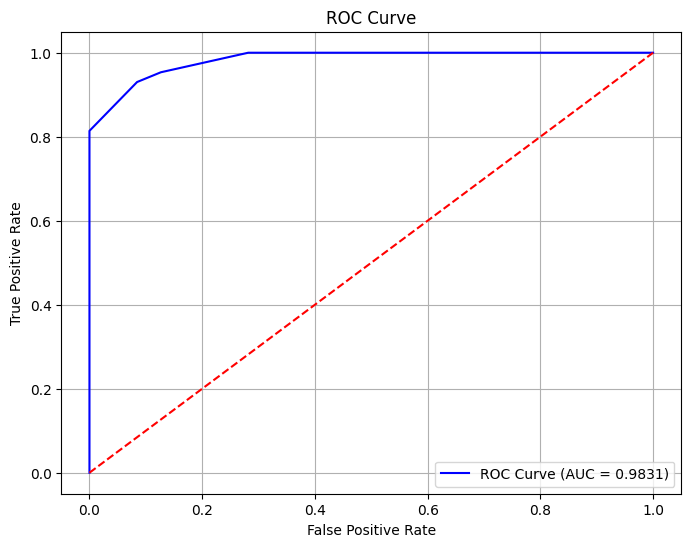

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the data into predictors (X) and response (y)
X = df.iloc[:, 2:]  # Last 10 columns as predictors
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Mapping 'M' to 1 and 'B' to 0

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the K-Nearest Neighbors model
k = 5  # Choose the number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### K-Nearest Neighbors (KNN) is a simple and intuitive classification algorithm, making it an excellent choice for exploratory analysis in breast cancer diagnosis. Its non-parametric nature means it does not assume any particular distribution of the data, which is advantageous in cases where features do not follow a standard distribution. Additionally, KNN can effectively capture non-linear decision boundaries, allowing it to identify complex relationships between tumor features and diagnoses. Since the dataset is normalized, KNN’s reliance on distance metrics like Euclidean distance is not hampered by scaling issues, ensuring it can fully utilize the feature space.

However, KNN has notable weaknesses in this context. The algorithm is computationally expensive as it must calculate distances between the test point and all training points for each prediction, which can become inefficient as dataset size increases. It is also highly sensitive to noisy data and irrelevant features, as outliers or irrelevant dimensions can significantly skew predictions. The performance of KNN depends heavily on the choice of distance metric; an inappropriate metric may fail to reflect the true relationships in the data. Furthermore, selecting the optimal number of neighbors (k) is crucial, as a small k might lead to overfitting by capturing noise, while a large k could result in underfitting by diluting the influence of relevant neighbors. Like many models, KNN can struggle with imbalanced datasets, as it may bias predictions toward the majority class, particularly with a large k. Additionally, KNN lacks interpretability compared to models like Naive Bayes, offering no clear insights into why specific predictions are made.

Overall, KNN is a robust choice for capturing complex, non-linear relationships in the dataset and can provide accurate predictions given its simplicity. However, its computational inefficiency, sensitivity to noise, and dependency on careful hyperparameter tuning may limit its practicality as a final model, especially for larger datasets or scenarios requiring fast predictions. While KNN can serve as a useful benchmark model, more advanced techniques, such as Support Vector Machines or ensemble models, may be better suited for real-world applications in breast cancer diagnosis.

### The performance metrics from the K-Nearest Neighbors (KNN) model—an accuracy of 92.11% and an AUC score of 0.9831—indicate strong, albeit slightly lower, predictive performance compared to the Naive Bayes model.

Accuracy, which measures the proportion of correctly predicted instances (both malignant and benign) out of the total predictions, shows that the KNN model correctly classified approximately 92.11% of cases in the test set. While this is a high accuracy, it is marginally lower than the Naive Bayes model's performance. Accuracy, however, should not be interpreted in isolation, especially if the dataset has class imbalance, as it does not account for how well the model distinguishes between classes.

The AUC score (Area Under the ROC Curve) provides a more comprehensive measure of the model’s ability to separate the two classes (malignant and benign) across all decision thresholds. The AUC score of 0.9831 is exceptionally high, indicating that the model is very effective at distinguishing between malignant and benign tumors. For instance, in randomly selecting one malignant and one benign case, the KNN model would assign a higher probability of malignancy to the malignant case over 98% of the time. While this AUC score is slightly lower than Naive Bayes’ AUC of 0.9918, it still reflects strong discriminatory power.

In summary, these metrics highlight that KNN performs well in predicting breast cancer diagnoses with high accuracy and excellent AUC. However, its slightly lower performance compared to Naive Bayes may reflect the sensitivity of KNN to the choice of hyperparameters like the number of neighbors (k) or potential noise in the dataset. It underscores the importance of carefully tuning and validating the model to maximize its potential.

Accuracy: 0.9298
AUC Score: 0.9905


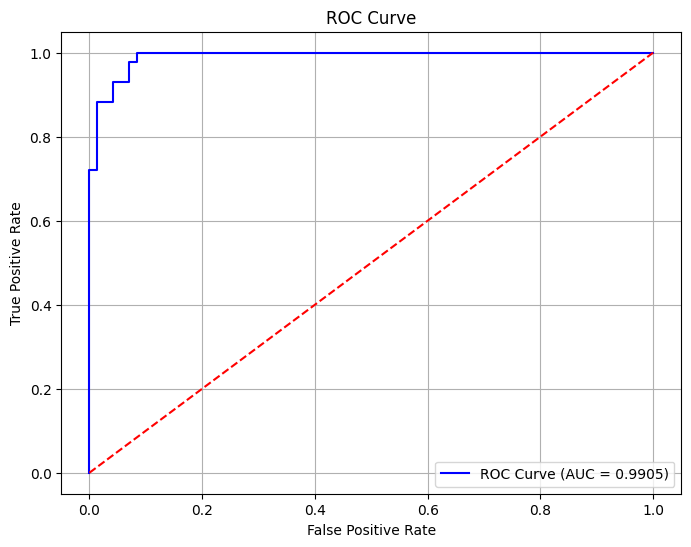

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the data into predictors (X) and response (y)
X = df.iloc[:, 2:]  # Last 10 columns as predictors
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Mapping 'M' to 1 and 'B' to 0

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear')  # Using 'liblinear' for binary classification
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Logistic regression is a straightforward and interpretable model that is well-suited for the breast cancer diagnosis task. Its simplicity allows for easy understanding of how changes in tumor features influence the likelihood of malignancy. Logistic regression produces probabilistic outputs, which are valuable for assessing the model’s confidence in its predictions and for decision-making based on thresholds. Additionally, its computational efficiency makes it suitable for smaller datasets, like the one in this context, especially when the features are properly normalized and preprocessed.

However, logistic regression has some limitations. It assumes that the relationship between the predictors and the log-odds of the outcome is linear. If the relationship is non-linear or complex, the model may struggle to capture it, leading to suboptimal performance. Logistic regression is also sensitive to feature correlations, which can weaken its reliability, particularly if features like radius, perimeter, and area are highly correlated. Its performance can degrade on non-linearly separable data and high-dimensional datasets if there is significant noise or irrelevant features. Moreover, logistic regression can struggle with class imbalance, favoring the majority class unless appropriate adjustments, such as re-sampling or class weighting, are made.

Overall, logistic regression is a strong choice for breast cancer diagnosis when the relationships between features and diagnosis are approximately linear. Its simplicity and efficiency make it an excellent baseline model. However, its reliance on linear assumptions and sensitivity to multicollinearity may limit its ability to capture complex relationships fully. Therefore, while logistic regression can perform well in this context, its performance should be compared to more flexible models like Support Vector Machines or ensemble models to ensure optimal diagnostic accuracy.

### The printed values from the logistic regression model—an accuracy of 92.98% and an AUC score of 0.9905—indicate strong performance for predicting breast cancer diagnoses.

Accuracy measures the proportion of correct predictions made by the model out of the total predictions. With an accuracy of 92.98%, the logistic regression model correctly classifies approximately 93% of the test cases as either malignant (M) or benign (B). This is a high accuracy, indicating that the model is quite effective at predicting the correct diagnosis for the majority of cases in the test dataset. Compared to K-Nearest Neighbors, this accuracy is slightly higher, suggesting that logistic regression may be better at generalizing from the training data to the test set, possibly due to its simpler and more direct approach.

AUC Score (Area Under the ROC Curve) provides a more nuanced measure of the model’s discriminative power. An AUC score of 0.9905 is exceptionally high, indicating that the logistic regression model is very capable of distinguishing between malignant and benign tumors across all possible classification thresholds. The AUC measures the model’s ability to separate the two classes, with a score close to 1.0 showing excellent performance. This score indicates that the model not only performs well but also does so with high confidence, meaning that its predictions are likely to be correct for the majority of cases. Compared to other models, this AUC score is slightly lower than the Naive Bayes model’s 0.9918, but still very strong.

In summary, these metrics demonstrate that logistic regression is a robust model for breast cancer diagnosis, offering high accuracy and excellent discriminatory ability as indicated by the AUC score. The high accuracy suggests that the model generalizes well to new, unseen data, while the AUC score reflects the model's ability to distinguish between the two classes, making logistic regression a strong candidate for predictive tasks in medical diagnosis.

# Final Thoughts:

Given the printed values for accuracy and AUC scores across three different models—Naive Bayes, K-Nearest Neighbors (KNN), and Logistic Regression—we can identify the best performing model based on these metrics.

Naive Bayes has the highest accuracy of 94.74% and an AUC score of 0.9918. This indicates that the model is highly effective at predicting the correct diagnosis for breast cancer, with a strong ability to distinguish between malignant and benign tumors. The high AUC score, in particular, suggests excellent discriminatory power, meaning that the model is capable of confidently distinguishing between the two classes across all decision thresholds. Naive Bayes' success can be attributed to its straightforward assumptions of conditional independence among features and its efficient handling of high-dimensional data, which are suitable for the breast cancer dataset.

K-Nearest Neighbors (KNN), while slightly lower in accuracy (92.11%) and AUC (0.9831), is still a strong performer, demonstrating good predictive capability. KNN’s performance is particularly notable due to its ability to capture complex, non-linear relationships between features. However, its computational inefficiency and sensitivity to noise and outliers limit its suitability as the top model for this task. The relatively lower AUC score compared to Naive Bayes indicates that while KNN is capable of good classification, it may struggle slightly in confidently distinguishing between classes in some cases.

Logistic Regression offers an accuracy of 92.98% and an AUC score of 0.9905, making it the second-best performing model. It combines the benefits of interpretability and computational efficiency with strong predictive performance. The simplicity of logistic regression, coupled with its calibrated probability outputs, makes it useful for straightforward decision-making. Its performance being slightly less than Naive Bayes in both metrics indicates that while logistic regression is an excellent choice for interpretability and quick, efficient training, it may not fully capture the complexities of the data as well as Naive Bayes does.

Lessons Learned from this analysis show the importance of model selection based on the nature of the dataset. Naive Bayes performed the best, likely due to its effective handling of high-dimensional and complex relationships, and its capability to work well even with imbalanced classes. KNN provided a good baseline for capturing non-linear relationships but was limited by computational cost and sensitivity to data noise. Logistic regression offered a balanced trade-off between simplicity and predictive power, but its linearity assumption prevented it from being the top choice.

Conclusion: The best performing model, Naive Bayes, is particularly useful for situations where data is abundant and features are complex but approximately independent. Its simplicity and robust performance across different thresholds make it highly suitable for breast cancer diagnosis. The choice of Naive Bayes reflects the importance of model assumptions aligning well with the underlying data structure, and its higher AUC score signifies superior ability to make accurate predictions consistently.

Limitations of this work include the small size of the dataset, which may not fully challenge the models, and the assumptions made during model training, such as feature independence in Naive Bayes. Additionally, more sophisticated models like Support Vector Machines or ensemble methods were not explored, which could have offered better performance, especially for complex data relationships. Further model validation on larger datasets, and the exploration of hyperparameter tuning, would likely improve the findings and offer deeper insights into model performance.